<a href="https://colab.research.google.com/github/Matvezy/Autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matvei Popov, Auto-encoder with multiple layers for Google Code in 
I am going to process the images from cifar10 datset, which is included in keras library, they are colored which makes the algorithm a bit more comlex, it is easier for me, cause I don not have to worry about uploading datasets in colab, and it also looks better than gray and white pictures :) 

I am going to use multiple layers convolutional neural network, lets get started.

# Imports: 

In [1]:
from keras.models import load_model, Model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Initializing the parametrs

In [0]:
batch_size = 256
epochs = 100

Uploading and initializing dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print("Train shape:", x_train.shape)
# Got 50000 images in train dataset, with 32x32 in size

170500096/170498071 [==============================] - 11s 0us/step
Train shape: (50000, 32, 32, 3)


Dividing data into validation and test datasets

In [0]:
x_validation = x_test[:5000]
x_test = x_test[5000:]

Defining the encoder network layers

In [6]:
#Conv2D creates the new convolution layer, BatchNormalization normalizes the activations of the previous layer at each batch, MaxPooling2D reduces the spatial size of the representation.
input_img = Input(shape=(32, 32, 3)) #input
'''We will start from 3, 3, 64 size for our image and then shrink to new convolution layers, dividing it b 2 every time, our goal is to achieve 8, 3, 3 in size (This a preety small size, so we may ). I am doing it this way because the smooth dvivsion by two guarantees us that we are shrinking it safer, without any assimertic loss of data'''
x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_img)
# I will also use the function that normalizes the activation of the layer, for a better result
x = BatchNormalization()(x)
# Using MaxPooling to reduce size until we get the desired, bottleneck size
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) #we have reached the bottleneck layer


Defining decoder network layers

In [7]:

input_encoded = Input(shape=(3, 3, 8))
#We get 3,3,8 size image(bottleneck) in the beginning, now we need to reconstruct it back to 3, 3, 64 image that we started with. 
x = Conv2D(8, (3, 3), padding='same', activation='relu')(input_encoded)
#Using Conv2D in an opposite direction
x = BatchNormalization()(x)
#Now we use the UpSampling thatis reconstructing the image, by incresing size, doing it until reach the initial size 3,3,64
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
# Our last step is to do last Conv2D layer, with a sigmoid function for activation, since it is the las modification, and normalize it.
x = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)
decoded = BatchNormalization()(x) #we got input back

Initializing encoder, decoder and autoencoder models

In [8]:
encoder= Model(input_img, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
#should use mean_squared_error because there are 256 color values, so nums are in interval between 0 and 255
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#summary for the whole autoencoder network
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
encoder (Model)              (None, 2, 2, 8)           26520     
_________________________________________________________________
decoder (Model)              multiple                  27111     
Total params: 53,631
Trainable params: 53,145
Non-trainable params: 486
_________________________________________________________________


Train network

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_validation, x_validation),
                use_multiprocessing=True
                )



Train on 50000 samples, validate on 5000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.5208 - val_loss: 0.2488
Epoch 2/100
50000/50000 [==============================] - 18s 359us/step - loss: 0.0963 - val_loss: 0.1436
Epoch 3/100
50000/50000 [==============================] - 18s 356us/step - loss: 0.0524 - val_loss: 0.1523
Epoch 4/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.0385 - val_loss: 0.1935
Epoch 5/100
50000/50000 [==============================] - 18s 358us/step - loss: 0.0340 - val_loss: 0.1780
Epoch 6/100
50000/50000 [==============================] - 18s 359us/step - loss: 0.0303 - val_loss: 0.1691
Epoch 7/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.0285 - val_loss: 0.1834
Epoch 8/100
50000/50000 [==============================] - 18s 358us/step - loss: 0.0270 - val_loss: 0.1728
Epoch 9/100
50000/50000 [==============================] - 18s 359us/step - loss: 0.0

Calculating the score for autoencoder, test, validate (I definetly did not get the best ones)

In [10]:
score = autoencoder.evaluate(x_test, x_test)
print(score)
test = autoencoder.predict(x_test)
validate = autoencoder.predict(x_validation)
print("Test:",np.average(test), "Validate:", np.average(validate))

5000/5000 [==============================] - 1s 256us/step
0.013930308565497398
Test: 0.4710047 Validate: 0.4773331


Displaying the result for test datset

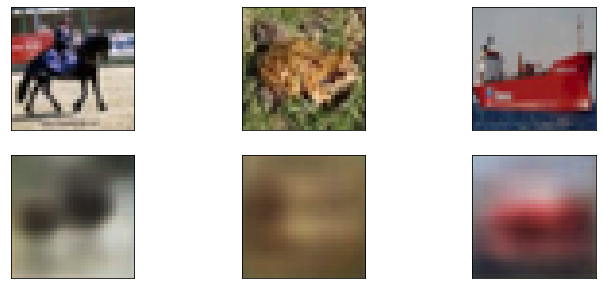

In [11]:
plt.figure(figsize=(20, 5))
for i in range(0,3):
  # display original data
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encode-decode data
  ax = plt.subplot(2, 5, i +1 + 5)
  plt.imshow(test[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Displaying the result for validate dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


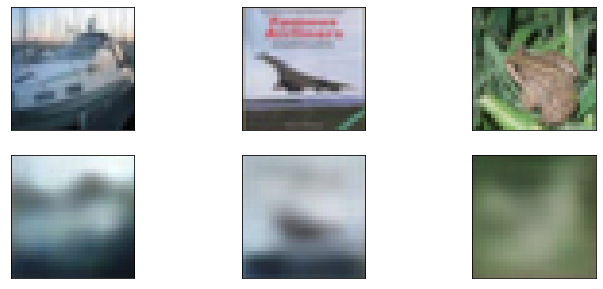

In [12]:
plt.figure(figsize=(20, 5))
for i in range(2,5):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_validation[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, 5, i +1 + 5)
  plt.imshow(validate[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Overall, I did  not get the best result, I am confused about where I could have made a mistake but right now autoencoder poorly does its job.